## 멜론 시대별 차트로 보는 장르별 선호 흐름

In [108]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import time
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [109]:
names = ['Date', '애시드/퓨전/팝', '드라마OST', '클래식', '인디음악', '영화OST', '발라드', '댄스', '록/메탈',
         'R&B/Soul', '일렉트로니카', '랩/힙합', 'EDM', 'POP', 'J-POP', '성인가요', '재즈', '뉴에이지',
         '포크/블루스', '만화/게임OST', '-']

In [110]:
def get_data_frame():
    # print("current : ", year, month)
    load_file = "C:/Users/jay/Jay/기말플젝/final_data/final.csv"

    try:
        data = pd.read_csv(load_file, encoding='cp949',
                           names=names, header=None)
    except UnicodeError:
        try:
            data = pd.read_csv(load_file, encoding='utf-8',
                               names=names, header=None)
        except Exception as e:
            print(e)
    return data

In [111]:
def get_eles_result(key):
    drop_list = []
    for ele in names:
        if ele != key and ele != 'Date':
            drop_list.append(ele)
    Y = mellon_df[key]
    X = mellon_df.drop(drop_list+[key], axis=1, inplace=False)

    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5, random_state=200)
    print("x : ",X)
    print("====" ,X_train)
    print("====" ,X_test)
    print("Y====" ,Y_train)
    print("====" ,Y_test)

    lr = LinearRegression()

    print("----", lr.fit(X_train, Y_train))
    lr.fit(X_train, Y_train)
    Y_predict = lr.predict(X_test)
    mse = mean_squared_error(Y_test, Y_predict)
    rmse = np.sqrt(mse)

    print("m",mse, "r",rmse)
    print('MSE : {0:.3f}, RMSE : {1:.3f}'.format(mse, rmse))
    print('R^2(Variance score): {0:.3f}'.format(r2_score(Y_test, Y_predict)))
    coef = pd.Series(data=np.round(lr.coef_, 1), index=X.columns)
    coef.sort_values(ascending=False)

    fig, axs = plt.subplots(figsize=(16, 10), ncols=2, nrows=2)
    x_features = ['Date', key]
    for i, feature in enumerate(x_features):
        row = i // 3
        col = i % 3
        sns.regplot(x=feature, y=key, data=mellon_df.drop(drop_list, axis=1, inplace=False), ax=axs[row][col])

In [112]:
def get_keys(data):
    keys = []
    for key in data.keys():
        if key != 'Date':
            keys.append([key])
    return keys

In [117]:
data = get_data_frame()
mellon_df = pd.DataFrame(data, columns=names)
elements = get_keys(data)

In [118]:
mellon_df

,Date,애시드/퓨전/팝,드라마OST,클래식,인디음악,영화OST,발라드,댄스,록/메탈,R&B/Soul,...,랩/힙합,EDM,POP,J-POP,성인가요,재즈,뉴에이지,포크/블루스,만화/게임OST,-
NaN,Date,애시드/퓨전/팝,드라마OST,클래식,인디음악,영화OST,발라드,댄스,록/메탈,R&B/Soul,...,랩/힙합,EDM,POP,J-POP,성인가요,재즈,뉴에이지,포크/블루스,만화/게임OST,-
0.0,2000-01,0.0,0.0,0.0,0.0,0.0,34.61538461538461,28.205128205128204,19.230769230769234,3.8461538461538463,...,10.256410256410255,0.0,0.0,0.0,0.0,0.0,1.282051282051282,1.282051282051282,0.0,1.282051282051282
1.0,2000-02,0.0,0.0,0.0,1.5151515151515151,0.0,34.84848484848485,33.33333333333333,18.181818181818183,3.0303030303030303,...,7.575757575757576,0.0,0.0,0.0,0.0,0.0,1.5151515151515151,0.0,0.0,0.0
2.0,2000-03,0.0,1.4705882352941175,0.0,1.4705882352941175,0.0,41.17647058823529,26.47058823529412,17.647058823529413,2.941176470588235,...,7.352941176470589,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.4705882352941175
3.0,2000-04,0.0,1.4084507042253522,0.0,1.4084507042253522,0.0,39.436619718309856,30.985915492957744,15.492957746478872,4.225352112676056,...,7.042253521126761,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234.0,2019-07,0.0,4.166666666666666,0.0,8.333333333333332,3.3333333333333335,29.166666666666668,15.833333333333332,5.833333333333333,8.333333333333332,...,10.833333333333334,0.0,10.833333333333334,0.0,0.8333333333333334,0.0,0.0,1.6666666666666667,0.0,0.0
235.0,2019-08,0.0,11.023622047244094,0.0,7.874015748031496,1.574803149606299,29.133858267716533,14.960629921259844,3.937007874015748,7.874015748031496,...,11.811023622047244,0.0,7.874015748031496,0.0,0.7874015748031495,0.0,0.0,2.3622047244094486,0.0,0.0
236.0,2019-09,0.0,10.606060606060606,0.0,11.363636363636363,1.5151515151515151,33.33333333333333,11.363636363636363,7.575757575757576,6.8181818181818175,...,9.090909090909092,0.0,6.8181818181818175,0.0,0.0,0.0,0.0,0.7575757575757576,0.0,0.0
237.0,2019-10,0.0,8.064516129032258,0.0,9.67741935483871,0.8064516129032258,37.096774193548384,8.870967741935484,8.870967741935484,8.064516129032258,...,9.67741935483871,0.0,5.64516129032258,0.0,0.0,0.0,0.0,2.4193548387096775,0.0,0.0


In [120]:
print("멜론 시대별 차트 데이터 크기 : ", mellon_df.shape)

멜론 시대별 차트 데이터 크기 :  (240, 21)


In [124]:
mellon_df = mellon_df.dropna(axis = 0)

,Date,애시드/퓨전/팝,드라마OST,클래식,인디음악,영화OST,발라드,댄스,록/메탈,R&B/Soul,...,랩/힙합,EDM,POP,J-POP,성인가요,재즈,뉴에이지,포크/블루스,만화/게임OST,-
NaN,Date,애시드/퓨전/팝,드라마OST,클래식,인디음악,영화OST,발라드,댄스,록/메탈,R&B/Soul,...,랩/힙합,EDM,POP,J-POP,성인가요,재즈,뉴에이지,포크/블루스,만화/게임OST,-
0.0,2000-01,0.0,0.0,0.0,0.0,0.0,34.61538461538461,28.205128205128204,19.230769230769234,3.8461538461538463,...,10.256410256410255,0.0,0.0,0.0,0.0,0.0,1.282051282051282,1.282051282051282,0.0,1.282051282051282
1.0,2000-02,0.0,0.0,0.0,1.5151515151515151,0.0,34.84848484848485,33.33333333333333,18.181818181818183,3.0303030303030303,...,7.575757575757576,0.0,0.0,0.0,0.0,0.0,1.5151515151515151,0.0,0.0,0.0
2.0,2000-03,0.0,1.4705882352941175,0.0,1.4705882352941175,0.0,41.17647058823529,26.47058823529412,17.647058823529413,2.941176470588235,...,7.352941176470589,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.4705882352941175
3.0,2000-04,0.0,1.4084507042253522,0.0,1.4084507042253522,0.0,39.436619718309856,30.985915492957744,15.492957746478872,4.225352112676056,...,7.042253521126761,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234.0,2019-07,0.0,4.166666666666666,0.0,8.333333333333332,3.3333333333333335,29.166666666666668,15.833333333333332,5.833333333333333,8.333333333333332,...,10.833333333333334,0.0,10.833333333333334,0.0,0.8333333333333334,0.0,0.0,1.6666666666666667,0.0,0.0
235.0,2019-08,0.0,11.023622047244094,0.0,7.874015748031496,1.574803149606299,29.133858267716533,14.960629921259844,3.937007874015748,7.874015748031496,...,11.811023622047244,0.0,7.874015748031496,0.0,0.7874015748031495,0.0,0.0,2.3622047244094486,0.0,0.0
236.0,2019-09,0.0,10.606060606060606,0.0,11.363636363636363,1.5151515151515151,33.33333333333333,11.363636363636363,7.575757575757576,6.8181818181818175,...,9.090909090909092,0.0,6.8181818181818175,0.0,0.0,0.0,0.0,0.7575757575757576,0.0,0.0
237.0,2019-10,0.0,8.064516129032258,0.0,9.67741935483871,0.8064516129032258,37.096774193548384,8.870967741935484,8.870967741935484,8.064516129032258,...,9.67741935483871,0.0,5.64516129032258,0.0,0.0,0.0,0.0,2.4193548387096775,0.0,0.0


In [53]:
print(mellon_df.info())

<class 'pandas.core.frame.DataFrame'>
Float64Index: 239 entries, 0.0 to 238.0
Data columns (total 21 columns):
Date        239 non-null int64
애시드/퓨전/팝    239 non-null float64
드라마OST      239 non-null object
클래식         239 non-null float64
인디음악        239 non-null float64
영화OST       239 non-null float64
발라드         239 non-null float64
댄스          239 non-null float64
록/메탈        239 non-null float64
R&B/Soul    239 non-null float64
일렉트로니카      239 non-null float64
랩/힙합        239 non-null float64
EDM         239 non-null float64
POP         239 non-null float64
J-POP       239 non-null float64
성인가요        239 non-null float64
재즈          239 non-null float64
뉴에이지        239 non-null float64
포크/블루스      239 non-null float64
만화/게임OST    239 non-null object
-           239 non-null object
dtypes: float64(17), int64(1), object(3)
memory usage: 41.1+ KB
None


In [54]:
mellon_df.dtypes

Date          int64
애시드/퓨전/팝    float64
드라마OST       object
클래식         float64
인디음악        float64
영화OST       float64
발라드         float64
댄스          float64
록/메탈        float64
R&B/Soul    float64
일렉트로니카      float64
랩/힙합        float64
EDM         float64
POP         float64
J-POP       float64
성인가요        float64
재즈          float64
뉴에이지        float64
포크/블루스      float64
만화/게임OST     object
-            object
dtype: object

In [55]:
mellon_df['Date'] = pd.to_datetime(mellon_df['Date'], dayfirst=True, errors='coerce')
mellon_df['Date'] = mellon_df['Date'].map(dt.datetime.toordinal)


In [56]:
mellon_df['Date'].head()

0.0    719163
1.0    719163
2.0    719163
3.0    719163
4.0    719163
Name: Date, dtype: int64

In [57]:
# mellon_df = mellon_df.set_index('Date')

In [58]:
mellon_df.index.is_unique

True

### 대략적인 년, 월

In [59]:
# print( int((mellon_df.index.max()- mellon_df.index.min()).days/30/12),"년")

In [60]:
# print( int((mellon_df.index.max()- mellon_df.index.min()).days/30),"개월")

### 자료형을 object => 숫자로 바꿔줌

In [102]:
for key in mellon_df.keys():
    if key != 'Date' and key !='드라마OST' and key != '만화/게임OST' and key != '-':
        mellon_df[key] = pd.to_numeric(mellon_df[key], errors='coerce')
print(mellon_df.dtypes)

Date          int64
애시드/퓨전/팝    float64
드라마OST       object
클래식         float64
인디음악        float64
영화OST       float64
발라드         float64
댄스          float64
록/메탈        float64
R&B/Soul    float64
일렉트로니카      float64
랩/힙합        float64
EDM         float64
POP         float64
J-POP       float64
성인가요        float64
재즈          float64
뉴에이지        float64
포크/블루스      float64
만화/게임OST     object
-            object
dtype: object


In [68]:
mellon_df.head()

,Date,애시드/퓨전/팝,드라마OST,클래식,인디음악,영화OST,발라드,댄스,록/메탈,R&B/Soul,...,랩/힙합,EDM,POP,J-POP,성인가요,재즈,뉴에이지,포크/블루스,만화/게임OST,-
0.0,719163,0.0,0.0,0.0,0.000000,0.0,34.615385,28.205128,19.230769,3.846154,...,10.256410,0.0,0.0,0.0,0.0,0.0,1.282051,1.282051,0.0,1.282051282051282
1.0,719163,0.0,0.0,0.0,1.515152,0.0,34.848485,33.333333,18.181818,3.030303,...,7.575758,0.0,0.0,0.0,0.0,0.0,1.515152,0.000000,0.0,0.0
2.0,719163,0.0,1.4705882352941175,0.0,1.470588,0.0,41.176471,26.470588,17.647059,2.941176,...,7.352941,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,1.4705882352941175
3.0,719163,0.0,1.4084507042253522,0.0,1.408451,0.0,39.436620,30.985915,15.492958,4.225352,...,7.042254,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
4.0,719163,0.0,1.3333333333333335,0.0,0.000000,0.0,40.000000,29.333333,12.000000,6.666667,...,10.666667,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0


In [69]:
print('데이터셋 크기 : ', mellon_df.shape)

데이터셋 크기 :  (239, 21)


### 드라마OST, 만화/게임OST, 영화OST등은 다른장르와 중복이 많고 특정 장르가 아니라고 생각하여 제외

x :           Date
0.0    719163
1.0    719163
2.0    719163
3.0    719163
4.0    719163
...       ...
234.0  719163
235.0  719163
236.0  719163
237.0  719163
238.0  719163

[239 rows x 1 columns]
====          Date
202.0  719163
211.0  719163
60.0   719163
154.0  719163
46.0   719163
...       ...
42.0   719163
68.0   719163
16.0   719163
105.0  719163
26.0   719163

[119 rows x 1 columns]
====          Date
146.0  719163
163.0  719163
190.0  719163
192.0  719163
104.0  719163
...       ...
72.0   719163
207.0  719163
107.0  719163
174.0  719163
114.0  719163

[120 rows x 1 columns]
Y==== 202.0    6.666667
211.0    6.837607
60.0     0.000000
154.0    0.909091
46.0     2.816901
           ...   
42.0     2.941176
68.0     0.000000
16.0     0.000000
105.0    0.000000
26.0     1.694915
Name: 인디음악, Length: 119, dtype: float64
==== 146.0    0.000000
163.0    0.000000
190.0    3.418803
192.0    0.869565
104.0    0.000000
           ...   
72.0     0.000000
207.0    8.196721
107.0    0.00000

x :           Date
0.0    719163
1.0    719163
2.0    719163
3.0    719163
4.0    719163
...       ...
234.0  719163
235.0  719163
236.0  719163
237.0  719163
238.0  719163

[239 rows x 1 columns]
====          Date
202.0  719163
211.0  719163
60.0   719163
154.0  719163
46.0   719163
...       ...
42.0   719163
68.0   719163
16.0   719163
105.0  719163
26.0   719163

[119 rows x 1 columns]
====          Date
146.0  719163
163.0  719163
190.0  719163
192.0  719163
104.0  719163
...       ...
72.0   719163
207.0  719163
107.0  719163
174.0  719163
114.0  719163

[120 rows x 1 columns]
Y==== 202.0    0.000000
211.0    1.709402
60.0     0.000000
154.0    0.000000
46.0     0.000000
           ...   
42.0     0.000000
68.0     0.000000
16.0     0.000000
105.0    0.000000
26.0     0.000000
Name: EDM, Length: 119, dtype: float64
==== 146.0    0.000000
163.0    0.000000
190.0    0.000000
192.0    0.000000
104.0    0.000000
           ...   
72.0     0.000000
207.0    0.819672
107.0    0.000000

C:\Users\jay\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51064 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jay\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 46356 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jay\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jay\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50501 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jay\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 51064 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\jay\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 46356 missing from current font.
 

C:\Users\jay\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51648 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jay\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 45684 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\jay\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 50640 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\jay\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\jay\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 51648 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\jay\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 54252 missing from current font.
  font.

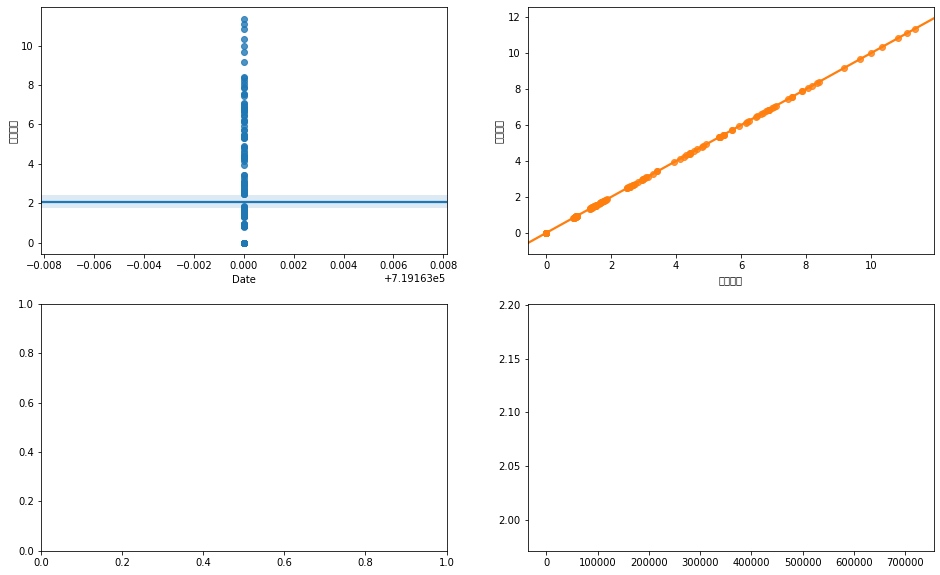

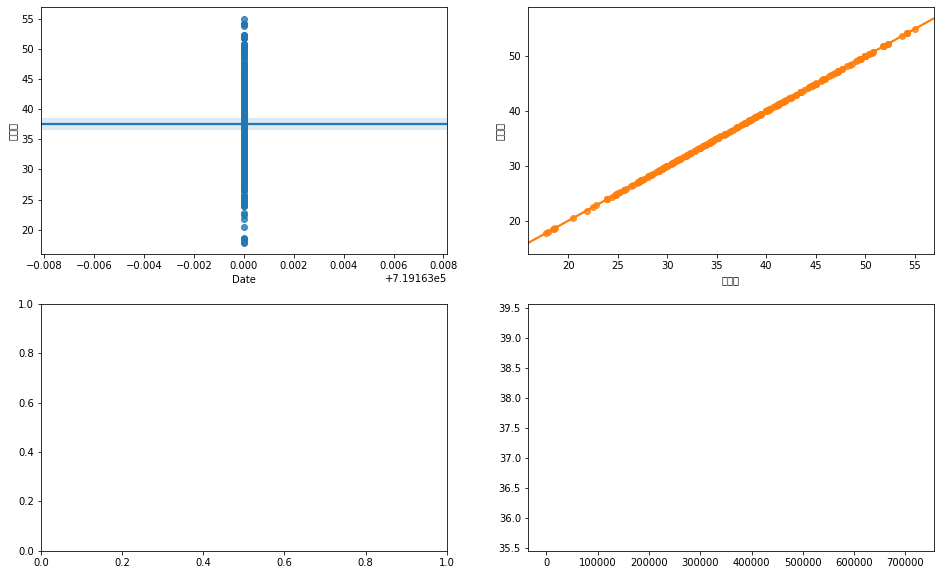

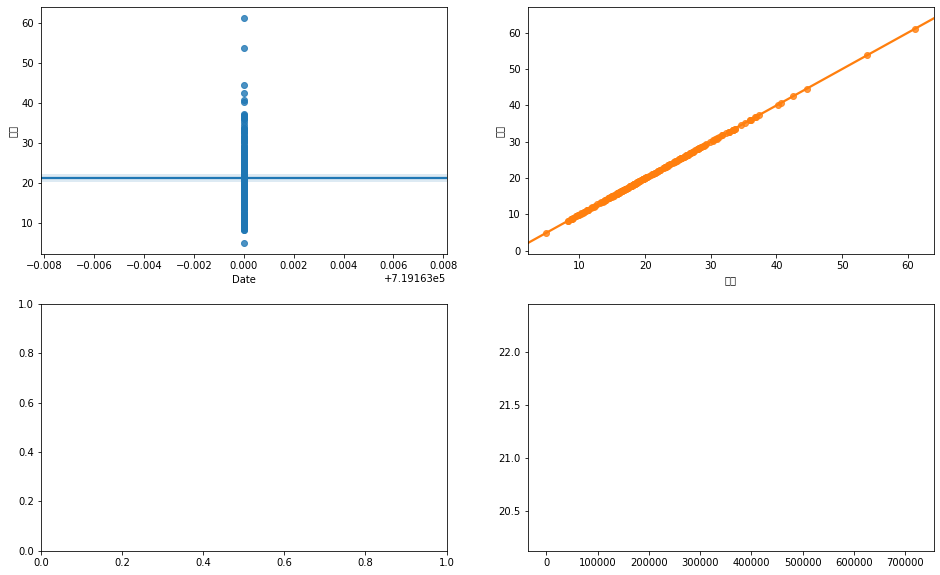

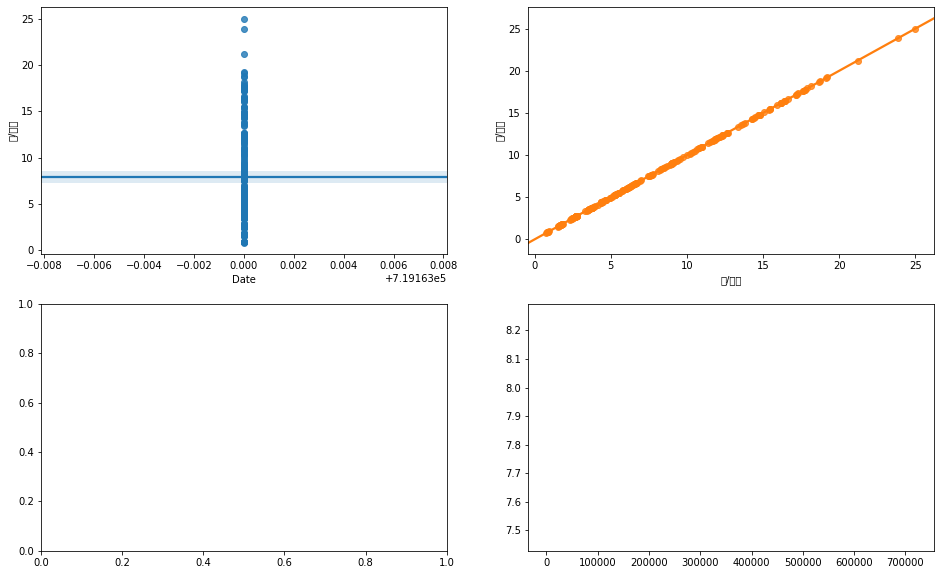

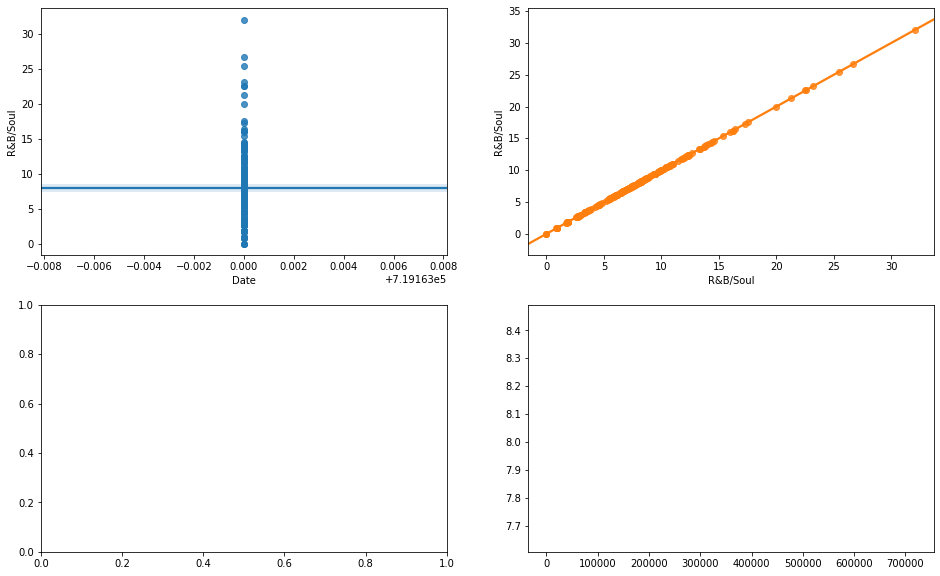

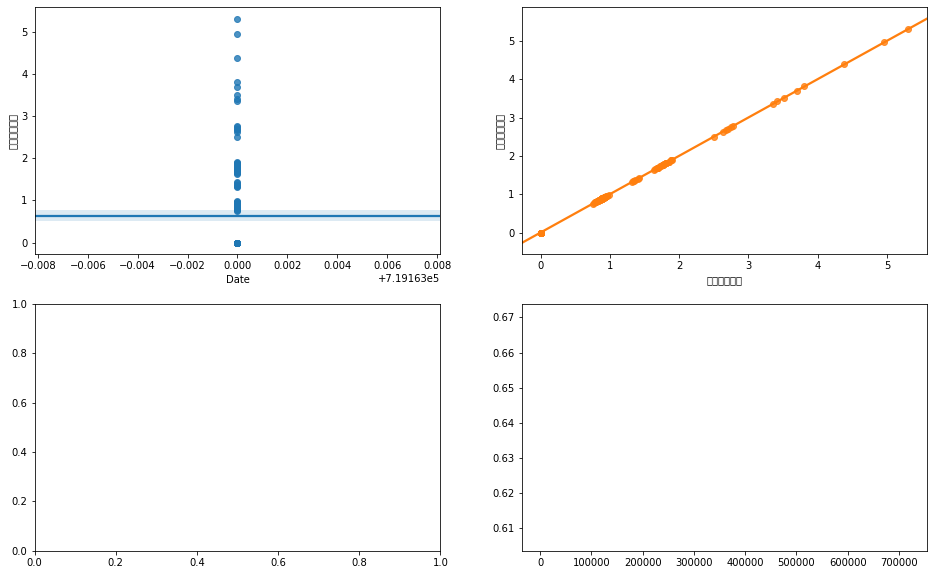

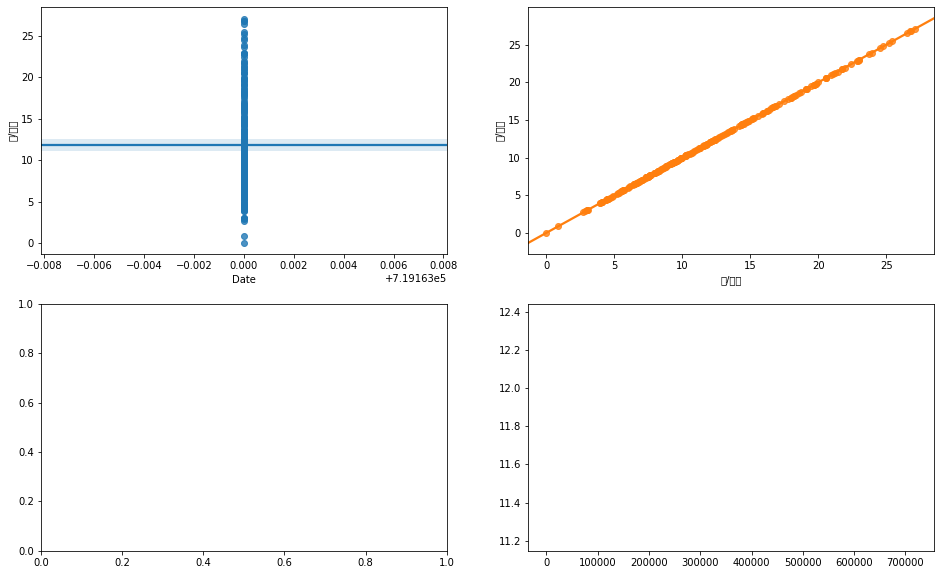

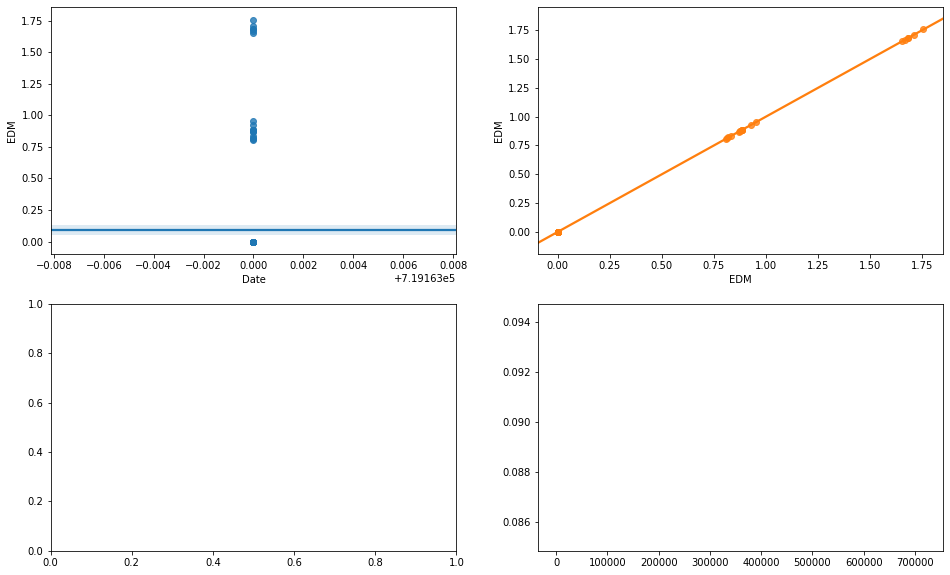

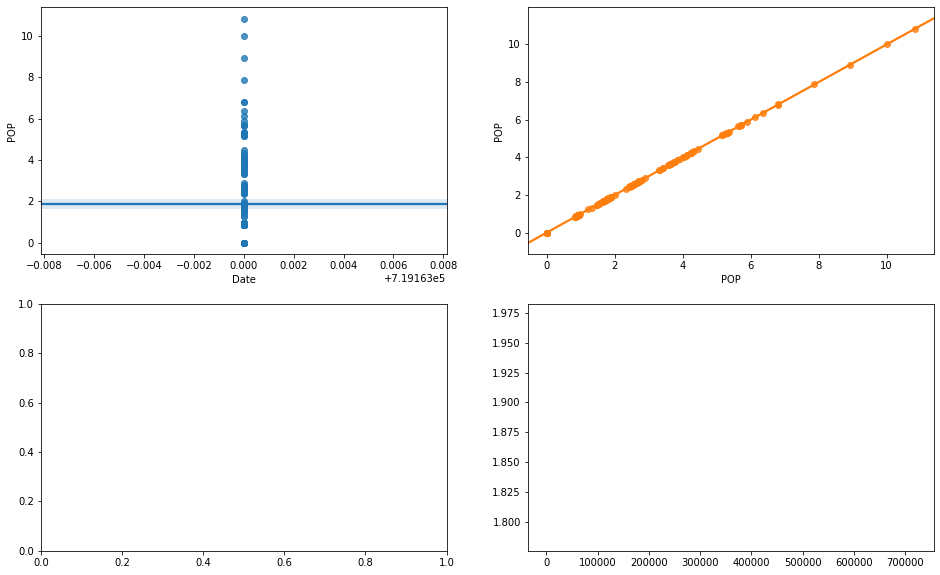

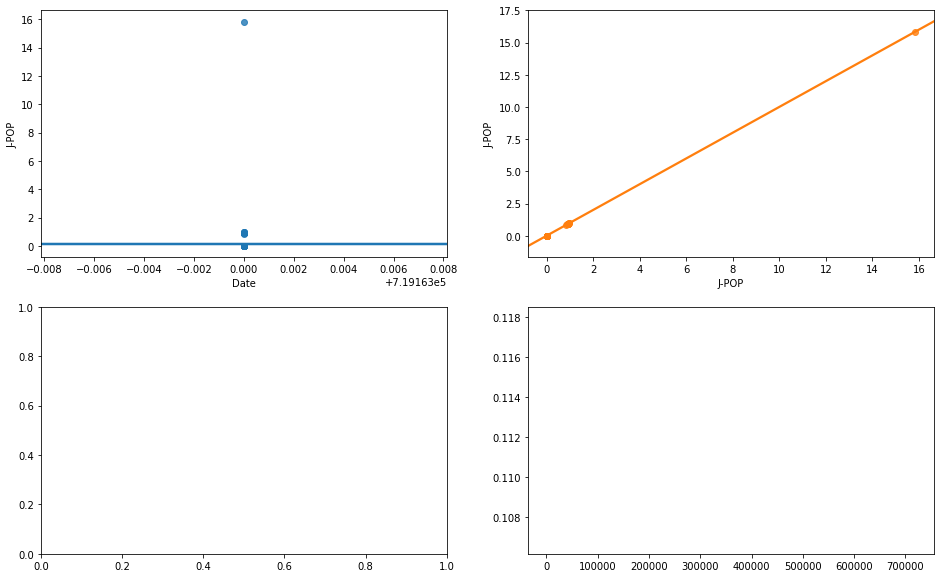

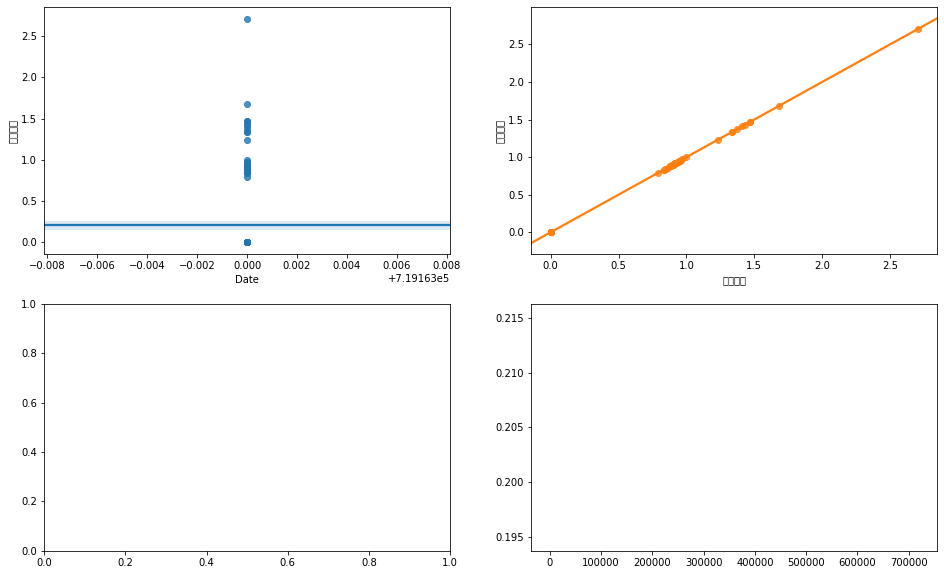

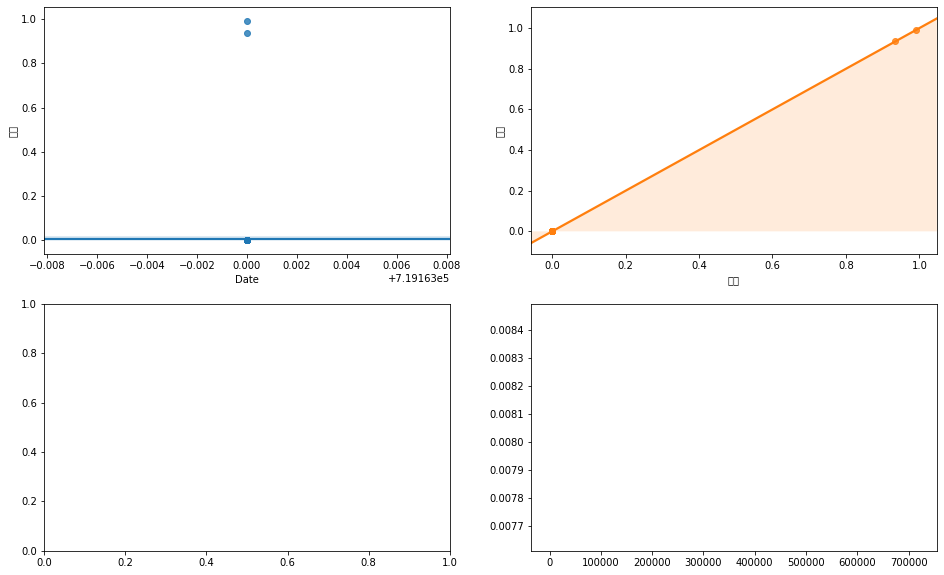

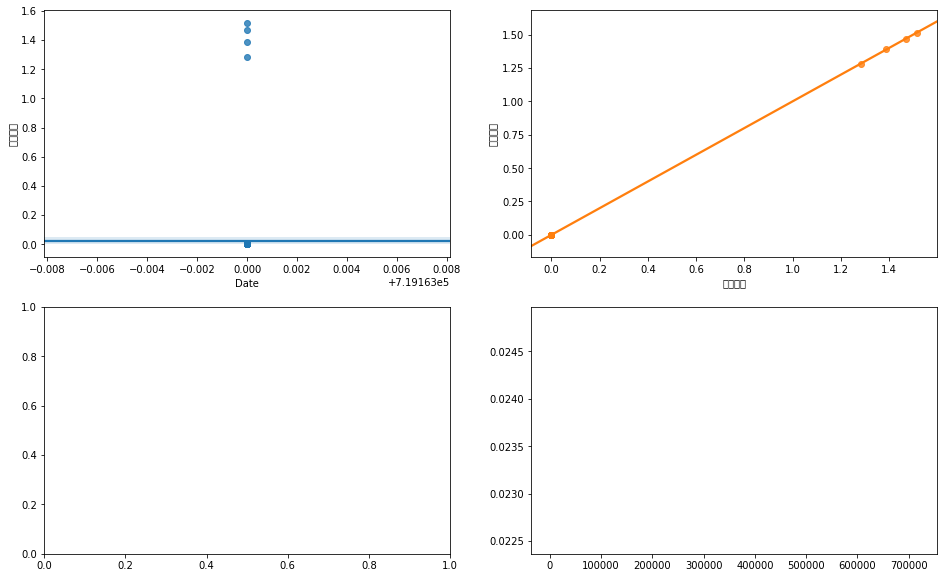

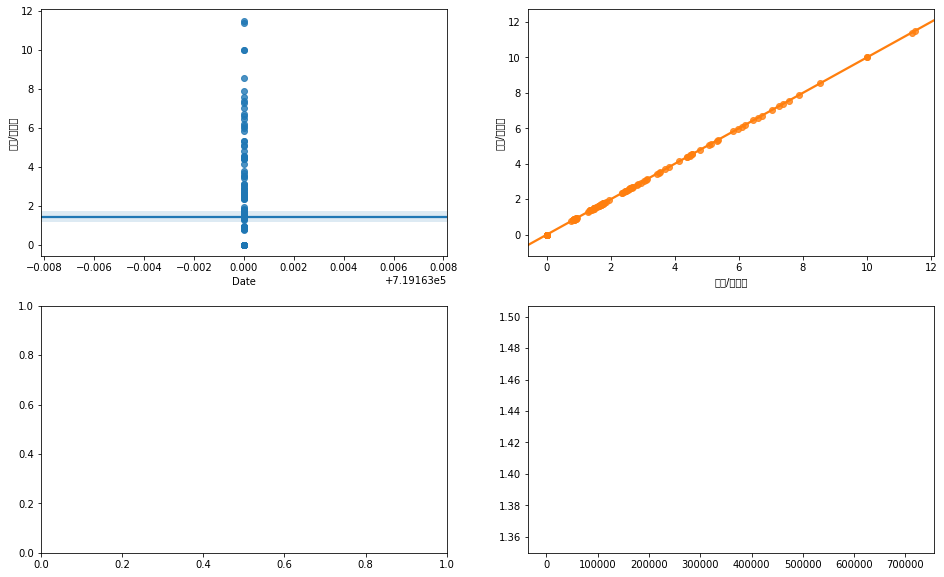

In [107]:
for key in names:
    if key != 'Date' and key != '드라마OST' and key != '만화/게임OST' and key != '영화OST' and key != '-' and key != '애시드/퓨전/팝' and key != '클래식':
        get_eles_result(key)